<div align="center">

# <font face="Gramond" color="orange">**<<  SEMESTER PROJECT >>**</font>

<hr>

#### <p><font face="Gramond" color="ORANGE" >**By Hamda Shahid**</font></p>
#### <p><font face="Gramond" color="white" >**23I-0069 (AI-B)**</font></p>
<!-- #### <p><font face="Gramond" color="white" >****</font></p> -->

</div>


## <font face="Gramond" color="orange">**PART 01**</font>

#### <font face="Gramond" color="white">_Web Scrapping_</font>

<hr style="border: 1px solid orange;">


- ##### <font face="Gramond" color="white">_Request to website_</font>


In [87]:
## code here
import requests
from bs4 import BeautifulSoup

url = 'https://www.opentable.com/state-and-lake-chicago-tavern?corrid=3034fe7e-5697-4ab0-bda0-fa00427df49f&avt=eyJ2IjoyLCJtIjoxLCJwIjowLCJzIjowLCJuIjowfQ&p=2&sd=2024-12-01T19%3A00%3A00'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    print("Success")
else:
    print("Failure")    


Success


- #### <font face="Gramond" color="white">_Setup Using Selenium_</font>


In [88]:
# code 
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException

import time

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

driver.get(url)
time.sleep(5)
# driver.quit()
review_list = []


- #### <font face="Gramond" color="white">_Scrapping Reviews & Extracting Information_</font>


In [93]:
check = True
while True:
    reviews = driver.find_elements(By.CLASS_NAME, 'afkKaa-4T28-')
    
    for review in reviews:
        data = review.find_element(By.CLASS_NAME, 'MpiILQAMSSg-')
        date_of_review = data.find_element(By.CLASS_NAME, 'iLkEeQbexGs-').text
        review_content = data.find_element(By.CLASS_NAME, '_6rFG6U7PA6M-').text
        # user_name = review.find_element(By.CLASS_NAME, '_1p30XHjz2rI- C7Tp-bANpE4-').text
        rating = data.find_elements(By.CLASS_NAME, '-k5xpTfSXac-')
        abc = review.find_element(By.CLASS_NAME, '_0Uufw15R3a4-')
        user_name = abc.find_element(By.TAG_NAME, 'p').text
        rating_element = data.find_element(By.CLASS_NAME, 'yEKDnyk-7-g-')
        rating_text = rating_element.get_attribute("aria-label")
        
        review_data = [user_name,date_of_review, review_content, rating_text]
        for rate in rating:
            review_data.append(rate.text)
        
        review_list.append(review_data)
    # try : 
    footer = driver.find_element(By.CLASS_NAME, '_1BEc9Aeng-Q-')
    buttons = footer.find_elements(By.CLASS_NAME, 'TkpxbcBbu80-')

    a = footer.find_element(By.CLASS_NAME, 'tj3k2TM4od4-')
    divs = a.find_elements(By.TAG_NAME, 'div')
    for index, div in enumerate(divs):
        if index == 2 and  div.get_attribute('class') == 'x7w3wiQqgDg-':
            print("No more pages")
            check = False
            break    

    if check == False:
        break   

    next_button = buttons[1] if len(buttons) > 1 else buttons[0]
    
    next_button.click()
    time.sleep(10)
    

    if len(review_list) % 50 == 0:
        driver.refresh()
        time.sleep(10)
        reviews = driver.find_elements(By.CLASS_NAME, 'afkKaa-4T28-')
        footer = driver.find_element(By.CLASS_NAME, '_1BEc9Aeng-Q-')
        buttons = footer.find_elements(By.CLASS_NAME, 'TkpxbcBbu80-')

print("Success , Total Reviews : ", len(review_list))

No more pages
Success , Total Reviews :  1524


In [94]:

# # a = driver.find_element(By.CLASS_NAME, 'tj3k2TM4od4-')
# # # print(a)
# # b = a.find_element(By.CLASS_NAME, 'x7w3wiQqgDg-')
# # # print(b.text)
# # # if b == None:
# # #     print("None")
# footer = driver.find_element(By.CLASS_NAME, '_1BEc9Aeng-Q-')
# buttons = footer.find_elements(By.CLASS_NAME, 'TkpxbcBbu80-')

# # next_button = buttons[1] if len(buttons) > 1 else buttons[0]
# # next_button.click()
# # time.sleep(10)
# # a = driver.find_element(By.CLASS_NAME, 'tj3k2TM4od4-')


# #     b = None
# # if b == None:
# #     print("None")
# # footer
# # Check the position of divs inside the footer
# a = footer.find_element(By.CLASS_NAME, 'tj3k2TM4od4-')
# divs = a.find_elements(By.TAG_NAME, 'div')
# for index, div in enumerate(divs):
#     print(f"Div {index} class name: {div.get_attribute('class')}")
#     # print(f"Div {index} position: {div.location}")
#     if index == 0 and  div.get_attribute('class') == 'TkpxbcBbu80-':
#         print("No more pages")    
# # print(footer)/

In [95]:
review_list

[['Bill',
  'Dined 2 days ago',
  'The food was excellent.  Very responsive service.',
  '5 stars',
  'Overall 5',
  'Food 5',
  'Service 5',
  'Ambience 4'],
 ['Heather',
  'Dined 3 days ago',
  'State & Lake was recommended to us and reviews looked great so we made a reservation, and it was fine, but it wasn\'t super memorable. Service was just okay - we had to ask for coffee several times, no one checked on us after food was delivered, one of the items on our order was not as expected, and we didn\'t really get any guidance, and because no one checked back we were never really able to ask or order more to amend what we received. We waited too long for our check and the whole experience was just sort of "meh". Food DID arrive really quickly and the restaurant is pretty and cozy. I ordered the Egg Bake and it was good, but the menu says "spicy sausage crumbles" -- it\'s chorizo! I was expecting spicy breakfast sausage and probably would have ordered something different with an accurat

- #### <font face="Gramond" color="white">_Data Frame_</font>


In [211]:
import pandas as pd
df = pd.DataFrame(review_list, columns=['User Name','Date of Review', 'Review Content', 'Rating', 'Overall Rating','Food Rating','Service Rating','Ambience Rating'])
df.drop_duplicates(inplace=True)
df

,User Name,Date of Review,Review Content,Rating,Overall Rating,Food Rating,Service Rating,Ambience Rating
0,Bill,Dined 2 days ago,The food was excellent. Very responsive service.,5 stars,Overall 5,Food 5,Service 5,Ambience 4
1,Heather,Dined 3 days ago,State & Lake was recommended to us and reviews...,3 stars,Overall 3,Food 4,Service 3,Ambience 3
2,mike,Dined 4 days ago,Table of 5 and the waiter was responsive. A li...,5 stars,Overall 5,Food 5,Service 4,Ambience 5
3,Joanna,"Dined on November 30, 2024","The waitress barely acknowledged us, she didn’...",1 star,Overall 1,Food 2,Service 1,Ambience 1
4,Anna,"Dined on November 30, 2024",Food was sub par. Expensive for what you get....,1 star,Overall 1,Food 1,Service 3,Ambience 2
...,...,...,...,...,...,...,...,...
1519,Annonymous,"Dined on June 24, 2009",The restaurant is new and was packed.... servi...,3 stars,Overall 3,Food 3,Service 2,Ambience 3
1520,OpenTable Diner,"Dined on June 22, 2009","I went to the Wit on a whim and didnt like ""th...",3 stars,Overall 3,Food 3,Service 3,Ambience 3
1521,RobF,"Dined on June 21, 2009",State & Lake was very good. I had the braised ...,5 stars,Overall 5,Food 4,Service 5,Ambience 5
1522,MNinChI,"Dined on June 14, 2009",Great food that was reasonably priced. Very cr...,4 stars,Overall 4,Food 4,Service 5,Ambience 5


- #### <font face="Gramond" color="white">_Saving Data to CSV_</font>


In [212]:
df.to_csv('state_and_lake_chicago_tavern_reviews.csv', index=False)

<hr style="border: 1px solid orange;">

## <font face="Gramond" color="orange">**PART 02**</font>

#### <font face="Gramond" color="white">_Prompt Engineering_</font>

<hr style="border: 1px solid orange;">


In [98]:
import os
# Set the environment variable within the notebook
os.environ["ANTHROPIC_API_KEY"] = "YOUR_API_KEY"

In [99]:
## CODE HERE
import pandas as pd
import anthropic
import json
    # import pandas as pd
output =[]
def generate_response(system, prompt):
    print("Proccessing...")
    # if isinstance(data, pd.DataFrame):
    #     data = data.to_string(index=False)

    client = anthropic.Anthropic()
    try :
        message = client.messages.create(
            model="claude-3-5-sonnet-20241022",
            max_tokens=1000,
            temperature=0,
            system=system,
            
            messages=[
                {
                    "role": "user",
                    "content": prompt
                }
            ]
        )
        # print(message)
        text_content = message.content[0].text.strip()  # Access the text inside the first TextBlock
        
        return json.loads(text_content)
    except Exception as e:
        print(f"Error processing review: {e}")
        return {"food_quality": "", "staff_service": ""}

j=0
for i in df['Review Content']:
    prompt = f"""
    Analyze the provided restaurant review and extract key information based on the following criteria:  
    1. Summarize comments specifically related to food quality.  
    2. Summarize comments specifically related to staff or service.  

    Requirements:  
    - Include only relevant data from the review; avoid adding any unrelated information.  
    - Ensure the output is factual and free of hallucinations.  
    - Exclude any personal details about the reviewer.  
    Review : "{i}"
    Respond in JSON format using the keys: `"food_quality"` and `"staff_service"`.  
    """
    system = "You are a highly intelligent and structured assistant. Extract relevant data from reviews."
    
    response = generate_response(system, prompt)
    # output.append(response)
    output.append({
                "name": df['User Name'][j],
                "dining_time": df['Date of Review'][j],
                "rating": df['Rating'][j],
                "food_quality": response.get("food_quality", ""),
                "staff_service": response.get("staff_service", "")
            })
    # print(response)
    j+=1
    print(j , "Done")
    
    


Proccessing...
1 Done
Proccessing...
2 Done
Proccessing...
3 Done
Proccessing...
4 Done
Proccessing...
5 Done
Proccessing...
6 Done
Proccessing...
7 Done
Proccessing...
8 Done
Proccessing...
9 Done
Proccessing...
10 Done
Proccessing...
11 Done
Proccessing...
12 Done
Proccessing...
13 Done
Proccessing...
14 Done
Proccessing...
15 Done
Proccessing...
16 Done
Proccessing...
17 Done
Proccessing...
18 Done
Proccessing...
19 Done
Proccessing...
20 Done
Proccessing...
21 Done
Proccessing...
22 Done
Proccessing...
23 Done
Proccessing...
24 Done
Proccessing...
25 Done
Proccessing...
26 Done
Proccessing...
27 Done
Proccessing...
28 Done
Proccessing...
29 Done
Proccessing...
30 Done
Proccessing...
31 Done
Proccessing...
32 Done
Proccessing...
33 Done
Proccessing...
34 Done
Proccessing...
35 Done
Proccessing...
36 Done
Proccessing...
37 Done
Proccessing...
38 Done
Proccessing...
39 Done
Proccessing...
40 Done
Proccessing...
41 Done
Proccessing...
42 Done
Proccessing...
43 Done
Proccessing...
44 Do

In [222]:
import json

with open('claude_response.json', 'w') as json_file:
    json.dump(output, json_file, indent=4)

    

In [ ]:
df['Review Content']

0       The food was excellent.  Very responsive service.
1       State & Lake was recommended to us and reviews...
2       Table of 5 and the waiter was responsive. A li...
3       The waitress barely acknowledged us, she didn’...
4       Food was sub par.  Expensive for what you get....
                              ...                        
1529    The restaurant is new and was packed.... servi...
1530    I went to the Wit on a whim and didnt like "th...
1531    State & Lake was very good. I had the braised ...
1532    Great food that was reasonably priced. Very cr...
1533    The only bad thing here is the drink pouring. ...
Name: Review Content, Length: 1531, dtype: object

<hr style="border: 1px solid orange;">

## <font face="Gramond" color="orange">**PART 03**</font>

#### <font face="Gramond" color="white">_GUI Development_</font>

<hr style="border: 1px solid orange;">



#### <font face="Gramond" color="white">_In the file dashboard.py_</font>


In [102]:
import pandas as pd
output_df = pd.DataFrame(output)
output_df

,name,dining_time,rating,food_quality,staff_service
0,Bill,Dined 2 days ago,5 stars,Excellent food,Very responsive service
1,Heather,Dined 3 days ago,3 stars,"{'positive': ['Food arrived quickly', 'Egg Bak...",{'negative': ['Had to request coffee multiple ...
2,mike,Dined 4 days ago,5 stars,None,"{'waiter': 'responsive', 'bar_service': 'slow'}"
3,Joanna,"Dined on November 30, 2024",1 star,Food described as mediocre; breakfast was not ...,"[Waitress provided minimal acknowledgment, Lon..."
4,Anna,"Dined on November 30, 2024",1 star,"{'general': 'Sub par food quality, expensive f...","{'positive': 'Server was nice and apologetic',..."
...,...,...,...,...,...
1519,Annonymous,"Dined on June 24, 2009",3 stars,None,Service was reported as slow
1520,OpenTable Diner,"Dined on June 22, 2009",3 stars,"{'positive': ['scallops were great', 'trout ha...",{'positive': ['Virginia the bartender was nice...
1521,RobF,"Dined on June 21, 2009",5 stars,{'braised_ribs_with_pasta': 'described as unbe...,"{'overall_service': 'top-notch', 'hostess': 'v..."
1522,MNinChI,"Dined on June 14, 2009",4 stars,"{'general': 'Great food, reasonably priced, cr...",{'comments': None}


<hr style="border: 1px solid orange;">

## <font face="Gramond" color="orange">**PART 04**</font>

#### <font face="Gramond" color="white">_Competitor Analysis_</font>

<hr style="border: 1px solid orange;">


- #### <font face="Gramond" color="white">_Get Input and request the url_</font>


In [113]:
## code here
import requests
from bs4 import BeautifulSoup

# url = 'https://www.opentable.com/state-and-lake-chicago-tavern?corrid=3034fe7e-5697-4ab0-bda0-fa00427df49f&avt=eyJ2IjoyLCJtIjoxLCJwIjowLCJzIjowLCJuIjowfQ&p=2&sd=2024-12-01T19%3A00%3A00'
url2 = input("Enter the URL of the restaurant: ")

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
response = requests.get(url2, headers=headers)

if response.status_code == 200:
    print("Success")
else:
    print("Failure")    
li = []

Success


- #### <font face="Gramond" color="white">_Setup Using Selenium_</font>


In [114]:
# code 
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException

import time

driver2 = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

driver2.get(url2)
time.sleep(5)
# driver.quit()
# review_list = []


- #### <font face="Gramond" color="white">_Scrapping Reviews & Extracting Information_</font>


In [145]:
check = True
while True:
    reviews = driver2.find_elements(By.CLASS_NAME, 'afkKaa-4T28-')
    
    for review in reviews:
        data = review.find_element(By.CLASS_NAME, 'MpiILQAMSSg-')
        date_of_review = data.find_element(By.CLASS_NAME, 'iLkEeQbexGs-').text
        review_content = data.find_element(By.CLASS_NAME, '_6rFG6U7PA6M-').text
        # user_name = review.find_element(By.CLASS_NAME, '_1p30XHjz2rI- C7Tp-bANpE4-').text
        rating = data.find_elements(By.CLASS_NAME, '-k5xpTfSXac-')
        abc = review.find_element(By.CLASS_NAME, '_0Uufw15R3a4-')
        user_name = abc.find_element(By.TAG_NAME, 'p').text
        rating_element = data.find_element(By.CLASS_NAME, 'yEKDnyk-7-g-')
        rating_text = rating_element.get_attribute("aria-label")
        
        review_data = [user_name,date_of_review, review_content, rating_text]
        for rate in rating:
            review_data.append(rate.text)
        
        li.append(review_data)
    # try : 
    footer = driver2.find_element(By.CLASS_NAME, '_1BEc9Aeng-Q-')
    buttons = footer.find_elements(By.CLASS_NAME, 'TkpxbcBbu80-')

    a = footer.find_element(By.CLASS_NAME, 'tj3k2TM4od4-')
    divs = a.find_elements(By.TAG_NAME, 'div')
    for index, div in enumerate(divs):
        if index == 2 and  div.get_attribute('class') == 'x7w3wiQqgDg-':
            print("No more pages")
            check = False
            break    

    if check == False:
        break   

    next_button = buttons[1] if len(buttons) > 1 else buttons[0]
    
    next_button.click()
    time.sleep(10)
    

    if len(li) % 50 == 0:
        driver2.refresh()
        time.sleep(10)
        reviews = driver.find_elements(By.CLASS_NAME, 'afkKaa-4T28-')
        footer = driver.find_element(By.CLASS_NAME, '_1BEc9Aeng-Q-')
        buttons = footer.find_elements(By.CLASS_NAME, 'TkpxbcBbu80-')

print("Success , Total Reviews : ", len(li))

No more pages
Success , Total Reviews :  1523


In [146]:
li

[['A',
  'Dined 4 days ago',
  "Though the service was lovely, the quality of the food was't what one should expect given the price point.",
  '2 stars',
  'Overall 2',
  'Food 2',
  'Service 4',
  'Ambience 3'],
 ['Susan',
  'Dined on December 3, 2024',
  'Great service and delicious lunch. The chicken salad sandwich and fries were perfect! Can’t wait to explore more items on the menu! Next time…',
  '5 stars',
  'Overall 5',
  'Food 5',
  'Service 5',
  'Ambience 5'],
 ['OpenTable Diner',
  'Dined on November 29, 2024',
  'Great Service; extensive wine list; great meal; convenient location',
  '5 stars',
  'Overall 5',
  'Food 5',
  'Service 5',
  'Ambience 5'],
 ['Catherine',
  'Dined on November 24, 2024',
  'There’s a reason this is my go-to restaurant. Incredible dinner menu and did not disappoint. Dinner service is at a relaxed pace; plan accordingly.',
  '5 stars',
  'Overall 5',
  'Food 5',
  'Service 5',
  'Ambience 4'],
 ['Sharon',
  'Dined on November 21, 2024',
  'Both the

- #### <font face="Gramond" color="white">_Data Frame_</font>


In [213]:
df2 = pd.DataFrame(li, columns=['User Name','Date of Review', 'Review Content', 'Rating', 'Overall Rating','Food Rating','Service Rating','Ambience Rating'])
df2.drop_duplicates(inplace=True)
df2

,User Name,Date of Review,Review Content,Rating,Overall Rating,Food Rating,Service Rating,Ambience Rating
0,A,Dined 4 days ago,"Though the service was lovely, the quality of ...",2 stars,Overall 2,Food 2,Service 4,Ambience 3
1,Susan,"Dined on December 3, 2024",Great service and delicious lunch. The chicken...,5 stars,Overall 5,Food 5,Service 5,Ambience 5
2,OpenTable Diner,"Dined on November 29, 2024",Great Service; extensive wine list; great meal...,5 stars,Overall 5,Food 5,Service 5,Ambience 5
3,Catherine,"Dined on November 24, 2024",There’s a reason this is my go-to restaurant. ...,5 stars,Overall 5,Food 5,Service 5,Ambience 4
4,Sharon,"Dined on November 21, 2024",Both the food and service experience are dimin...,1 star,Overall 1,Food 2,Service 1,Ambience 4
...,...,...,...,...,...,...,...,...
1518,KayCee,"Dined on January 25, 2009",Very enjoyable experience. We plan on returnin...,5 stars,Overall 5,Food 5,Service 5,Ambience 5
1519,bridie,"Dined on January 25, 2009",Heirloom was the answer to our ongoing attempt...,5 stars,Overall 5,Food 5,Service 5,Ambience 4
1520,LoveNYC,"Dined on January 11, 2009","Very nice find in New Haven. Great service, te...",4 stars,Overall 4,Food 4,Service 5,Ambience 5
1521,OpenTable Diner,"Dined on January 5, 2009",My husband and I went to dinner here and our e...,4 stars,Overall 4,Food 4,Service 4,Ambience 5


- #### <font face="Gramond" color="white">_Saving Data to CSV_</font>


In [214]:
df2.to_csv('second_restaurant_reviews.csv', index=False)


- #### <font face="Gramond" color="white">_Plots_</font>


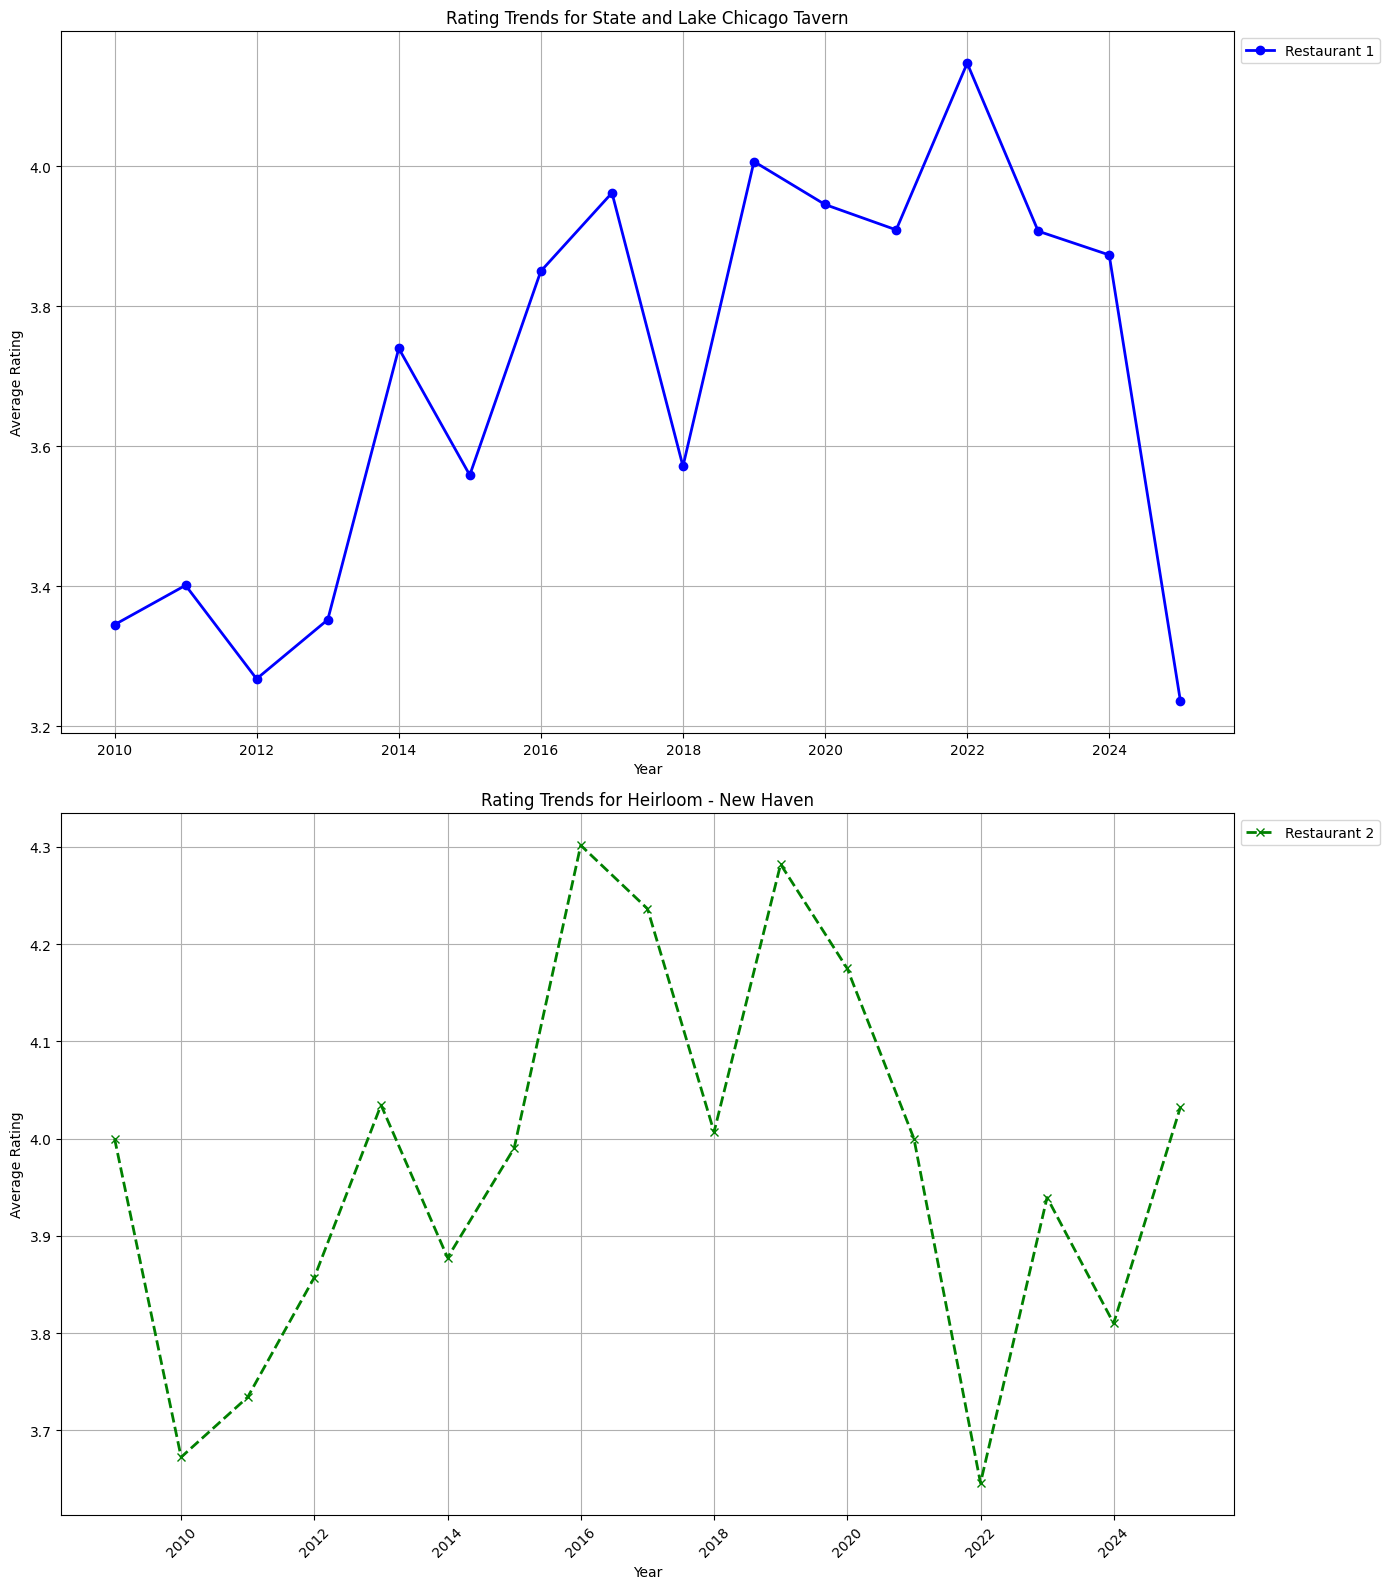

In [227]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

def convert_date(date_str):
    if 'days ago' in date_str:
        days_ago = int(date_str.split()[1])
        return datetime.now() - timedelta(days_ago)
    elif 'Dined on' in date_str:
        return pd.to_datetime(date_str.replace('Dined on ', ''), format='%B %d, %Y')
    else:
        return pd.to_datetime(date_str, format="%Y-%m-%d")


review_dates_1 = df["Date of Review"].apply(convert_date)
review_dates_2 = df2["Date of Review"].apply(convert_date)


ratings_1 = df["Rating"].apply(lambda x: int(x.split()[0]))
ratings_2 = df2["Rating"].apply(lambda x: int(x.split()[0]))


df1_resampled = pd.DataFrame({'Date': review_dates_1, 'Rating': ratings_1})
df2_resampled = pd.DataFrame({'Date': review_dates_2, 'Rating': ratings_2})


df1_yearly = df1_resampled.resample('YE', on='Date').mean()  
df2_yearly = df2_resampled.resample('YE', on='Date').mean()


# Plot separate charts for each restaurant
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# Plot for Restaurant 1
ax1.plot(df1_yearly.index, df1_yearly['Rating'], label='Restaurant 1', color='blue', marker='o', linestyle='-', linewidth=2)
ax1.set_title('Rating Trends for State and Lake Chicago Tavern')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rating')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.grid(True)

# Plot for Restaurant 2
ax2.plot(df2_yearly.index, df2_yearly['Rating'], label='Restaurant 2', color='green', marker='x', linestyle='--', linewidth=2)
ax2.set_title('Rating Trends for Heirloom - New Haven')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Rating')
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.grid(True)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Improve layout and display
plt.tight_layout()
plt.show()


<hr style="border: 1px solid orange;">

## <font face="Gramond" color="orange">**PART 05**</font>

#### <font face="Gramond" color="white">_Bonus_</font>

<hr style="border: 1px solid orange;">


#### <font face="Gramond" color="white">_Graph_</font>


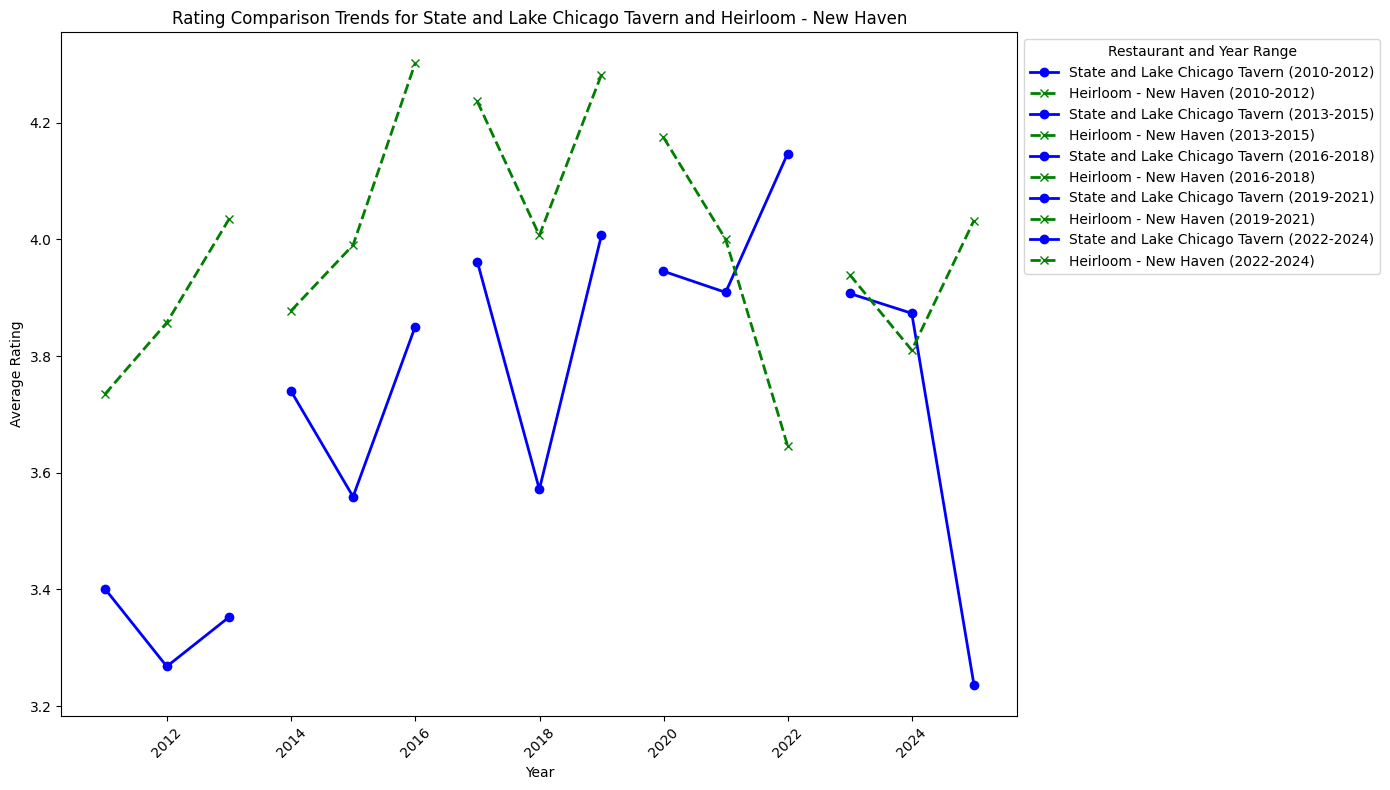

In [229]:
## CODE HERE
fig, ax = plt.subplots(figsize=(14, 8))
year_ranges = [(2010, 2012), (2013, 2015), (2016, 2018), (2019, 2021), (2022, 2024)]


for start_year, end_year in year_ranges:

    df1_range = df1_yearly[(df1_yearly.index.year >= start_year) & (df1_yearly.index.year <= end_year)]
    df2_range = df2_yearly[(df2_yearly.index.year >= start_year) & (df2_yearly.index.year <= end_year)]
    
    ax.plot(df1_range.index, df1_range['Rating'], label=f'State and Lake Chicago Tavern ({start_year}-{end_year})', color='blue', marker='o', linestyle='-', linewidth=2)
    
    ax.plot(df2_range.index, df2_range['Rating'], label=f'Heirloom - New Haven ({start_year}-{end_year})', color='green', marker='x', linestyle='--', linewidth=2)


ax.set_title('Rating Comparison Trends for State and Lake Chicago Tavern and Heirloom - New Haven')
ax.set_xlabel('Year')
ax.set_ylabel('Average Rating')

plt.xticks(rotation=45)

# Show the legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Restaurant and Year Range')

plt.tight_layout()
plt.show()

#### <font face="Gramond" color="white">_Overall Review_</font>


In [ ]:
# Generate overall review summary
def overall_review_summary(df, restaurant_name):
    avg_rating = df['Rating'].apply(lambda x: int(x.split()[0])).mean()
    total_reviews = len(df)
    positive_reviews = df[df['Rating'].str.contains('5 stars|4 stars|3 stars')].shape[0]
    negative_reviews = df[df['Rating'].str.contains('1 star|2 stars')].shape[0]
    
    summary = f"""
    Overall Review Summary for {restaurant_name}:
    - Average Rating: {avg_rating:.2f} stars
    - Total Reviews: {total_reviews}
    - Positive Reviews (5/4/3 stars): {positive_reviews}
    - Negative Reviews (1/2 star): {negative_reviews}
    """
    return summary

# Print overall review summaries for both restaurants
print(overall_review_summary(df, "State and Lake Chicago Tavern"))
print(overall_review_summary(df2, "Heirloom - New Haven"))



    Overall Review Summary for Restaurant 1:
    - Average Rating: 3.68 stars
    - Total Reviews: 1511
    - Positive Reviews (5/4/3 stars): 1260
    - Negative Reviews (1/2 star): 251
    

    Overall Review Summary for Restaurant 2:
    - Average Rating: 4.01 stars
    - Total Reviews: 1510
    - Positive Reviews (5/4/3 stars): 1334
    - Negative Reviews (1/2 star): 176
    


<hr style="border: 1px solid orange;">